In [1]:
# Code:     Exploratory Data Analysis using data scraped from top 100 posts of subreddit r/srilanka  
# Authors:  Ayush Shrivastava and Ankit Yadav  
# Date:     24-08-2023

## **Library Imports**

In [ ]:
# Importing all the neccesary libraries
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import numpy as np
import re

from matplotlib import colormaps
import matplotlib.pyplot as plt

from collections import  Counter

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Loading the Corpus of Reddit Comments from r/srilanka**

For this analysis, we gathered a text corpus comprising comments from the top 100 posts on the subreddit r/srilanka. To accomplish this, we employed the Python Reddit API Wrapper (PRAW), a powerful tool for extracting content from Reddit.

The extracted comments from the top 100 posts on r/srilanka were then compiled into a structured dataset.

In [ ]:
# Reading Combined Comment Corpus
Data = pd.read_csv('./Corpus/Comments_Corpus.csv')
Data.head()

,COMMENT_ID,COMMENT_PARENT_ID,COMMENT_SCORE,COMMENT_DEPTH,COMMENT_CREATED_TIMESTAMP,AUTHOR_USERNAME,COMMENT_TEXT_CONTENT,MODEL_LABEL_CARDIFFNLP,MODEL_LABEL_FINITEAUTOMATA,MODEL_LABEL_SEETHAL,MODEL_MAJORITY
0,j49rwpw,t3_10bemvn,1,0,1.673668e+09,AutoModerator,**Please note that this is a meme/satire threa...,neutral,neutral,neutral,neutral
1,j4a8oix,t3_10bemvn,28,0,1.673678e+09,FugerativeG,Wait isn't this a cricketer?,neutral,neutral,neutral,neutral
2,j4anmfk,t3_10bemvn,28,0,1.673690e+09,Automatic-Capital105,He also has a PhD but this poor guy doesn't ...,negative,negative,neutral,negative
3,j4a0vf4,t3_10bemvn,51,0,1.673673e+09,Creepy_Branch_5532,Where he works gruelling 12 hour shifts at a b...,neutral,neutral,neutral,neutral
4,j4ammy4,t3_10bemvn,18,0,1.673689e+09,NaN,"poor son's ""watch"" worth more than the house",negative,neutral,neutral,neutral


## Data Preprocessing for Exploratory Analysis

Before conducting exploratory analysis, we need to preprocess the data to ensure its quality and consistency.

Here are the steps we will take for data preprocessing:

1. **Converting to Lower Case:** We will convert all the text in the comments to lowercase. This ensures uniformity and helps in accurate tokenization and analysis.

2. **Removing URLs:** Any URLs present in the comments will be removed. URLs don't contribute to sentiment analysis and can be eliminated from the text.

3. **Removing GIFs:** Similar to URLs, GIFs and other multimedia content will be removed from the comments as they don't carry textual sentiment information.

4. **Removing Special Characters:** Special characters, punctuation marks, and symbols will be removed from the text. This simplifies the text and ensures that sentiment analysis focuses on words and their meanings.

5. **Tokenization:** We will tokenize the preprocessed text, splitting it into individual words or tokens. This is a crucial step for further analysis.

6. **Lemmatization:** Lemmatization involves reducing words to their base or root form. This helps in consolidating words with similar meanings and improves analysis accuracy.

**NOTE :-** We have not removed stopwords as the preprocessing steps as we might be needing them at some point later on. We will be removing stopwords as required.

In [ ]:
# This function will be used to clean the Corpus
def clean_text(text):
    text = text.lower()                                                             # Convert to lowercase
    text = re.sub(r'http\S+', '', text)                                             # Remove URLs
    text = re.sub(r'<.*?>', '', text)                                               # Remove HTML tags
    text = re.sub(r'(!.*)','', text)                                                # Remove gif
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)                                        # Remove special characters
    tokens = word_tokenize(text)                                                    # Tokenization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]                        # Lemmatization
    cleaned_text = ' '.join(tokens)                                                 # Joining the tokens
    return cleaned_text                                                             # Returning Clean text data
Data['RAW_TXT'] = Data['COMMENT_TEXT_CONTENT']
Data['COMMENT_TEXT_CONTENT'] = Data['COMMENT_TEXT_CONTENT'].apply(clean_text)

In [ ]:
Data.head(5)

,COMMENT_ID,COMMENT_PARENT_ID,COMMENT_SCORE,COMMENT_DEPTH,COMMENT_CREATED_TIMESTAMP,AUTHOR_USERNAME,COMMENT_TEXT_CONTENT,MODEL_LABEL_CARDIFFNLP,MODEL_LABEL_FINITEAUTOMATA,MODEL_LABEL_SEETHAL,MODEL_MAJORITY,RAW_TXT
0,j49rwpw,t3_10bemvn,1,0,1.673668e+09,AutoModerator,please note that this is a meme satire thread ...,neutral,neutral,neutral,neutral,**Please note that this is a meme/satire threa...
1,j4a8oix,t3_10bemvn,28,0,1.673678e+09,FugerativeG,wait isn t this a cricketer,neutral,neutral,neutral,neutral,Wait isn't this a cricketer?
2,j4anmfk,t3_10bemvn,28,0,1.673690e+09,Automatic-Capital105,he also ha a phd but this poor guy doesn t hav...,negative,negative,neutral,negative,He also has a PhD but this poor guy doesn't ...
3,j4a0vf4,t3_10bemvn,51,0,1.673673e+09,Creepy_Branch_5532,where he work gruelling hour shift at a buildi...,neutral,neutral,neutral,neutral,Where he works gruelling 12 hour shifts at a b...
4,j4ammy4,t3_10bemvn,18,0,1.673689e+09,NaN,poor son s watch worth more than the house,negative,neutral,neutral,neutral,"poor son's ""watch"" worth more than the house"


# **Exploratory Data Analysis**

## **Comment Score Distribution and Comment Depth Distribution**

To gain insights into the engagement and structure of comments within the r/srilanka subreddit, we will analyze the distribution of comment scores and comment depths. These visualizations can reveal trends that may provide valuable information about user interactions and content popularity.

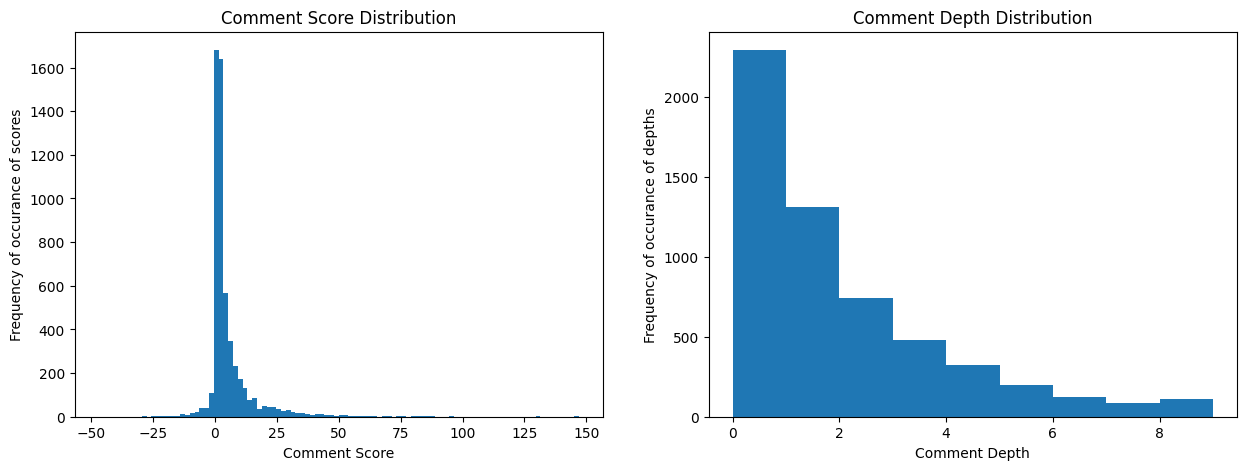

In [ ]:
# Comment Score Distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(Data['COMMENT_SCORE'], bins=100)
plt.title('Comment Score Distribution')
plt.xlabel('Comment Score')
plt.ylabel('Frequency of occurance of scores')

plt.subplot(1, 2, 2)
plt.hist(Data['COMMENT_DEPTH'], bins=max(Data['COMMENT_DEPTH']),align='mid')
plt.title('Comment Depth Distribution')
plt.xlabel('Comment Depth')
plt.ylabel('Frequency of occurance of depths')
plt.show()


 We can see that most of the comments have score less than 25 and most of the comments lie below the depth of 4.

 The fact that most comments have scores below 25 suggests that while there might be popular comments with higher scores, the majority of comments receive moderate engagement in terms of upvotes and downvotes.

 the majority of comments having a depth below 4 indicates that most discussions and conversations on the subreddit tend to remain relatively shallow, with only a few levels of nested replies. This could imply that the discussions are concise and tend to stay closer to the original post, rather than branching off into lengthy sub-conversations

## **Comment Depth vs Comment Score Relation**

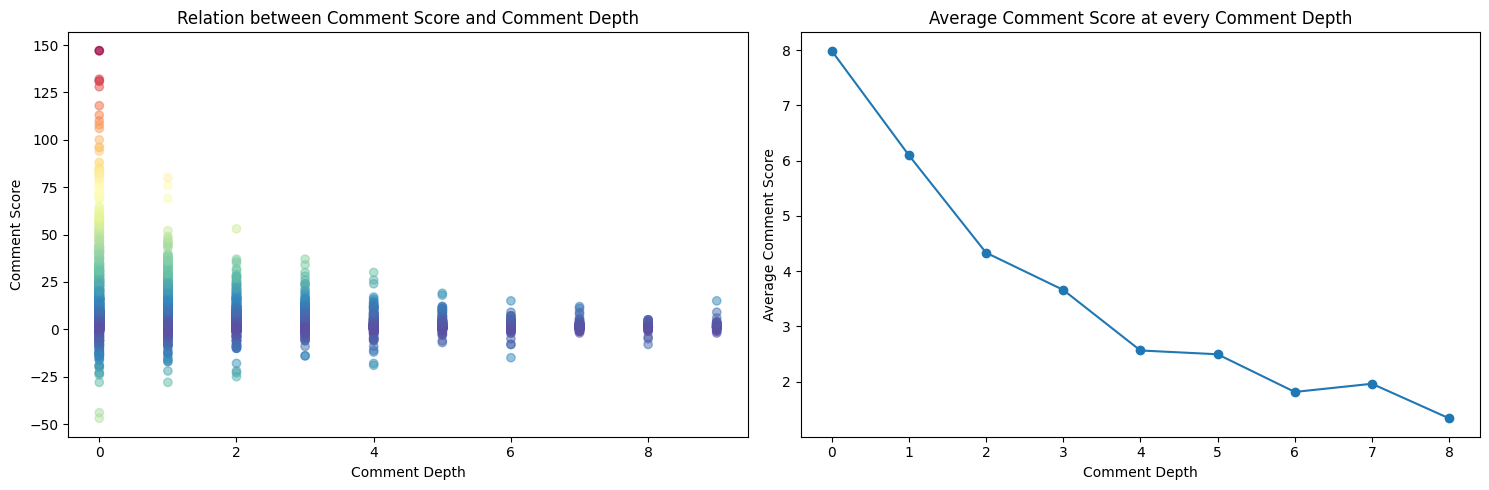

In [ ]:
# PLotting a scatter plot of comment score vs comment depth
plt.figure(figsize=(15,5) ,dpi=100,tight_layout=True)

plt.subplot(1, 2, 1)
plt.scatter(Data['COMMENT_DEPTH'],Data['COMMENT_SCORE'],alpha=0.5,c=abs(Data['COMMENT_SCORE']),cmap='Spectral_r')
plt.title('Relation between Comment Score and Comment Depth')
plt.xlabel('Comment Depth')
plt.ylabel('Comment Score')


plt.subplot(1, 2, 2)
avg_comments = []
for i in range(max(Data['COMMENT_DEPTH'])):
    avg_comments.append(np.mean(Data[Data['COMMENT_DEPTH']==i]['COMMENT_SCORE']))
plt.plot(avg_comments,marker='o')
plt.title('Average Comment Score at every Comment Depth')
plt.xlabel('Comment Depth')
plt.ylabel('Average Comment Score')

plt.show()

The observations from the plots indicate that as the depth of the comment increases:

* **Visibility and Readability Decrease:** Comments that are deeper in the comment tree tend to receive less visibility and are less likely to be read by a broader audience.

* **Engagement Decreases:** The decreasing trend in comment scores (upvotes and downvotes) as depth increases suggests that users are less likely to engage with comments deep within a conversation. This can be attributed to the reduced visibility and the fact that users might not continue scrolling to the bottom of a lengthy discussion.

Users tend to engage more with comments at the top level or with those that are closer to the main post. As conversations become more nested and deeper, engagement tends to drop.

----

## **Distribution of Model Predictions for Sentiment Analysis**

In this analysis, we employed three of the most widely recognized sentiment analysis models available from the Hugging Face model repository. The primary objective was to conduct inference on a dataset of comments, thereby generating sentiment labels for the entire corpus. The sentiments expressed in the labels are categorized into three classes: Positive, Negative, and Neutral.

The sentiment analysis models utilized for this task were selected based on their popularity and download rates on the Hugging Face platform. The following models were chosen:

1. **Cardiffnlp/twitter-roberta-base-sentiment-latest**
2. **Finiteautomata/bertweet-base-sentiment-analysis**
3. **Seethal/sentiment_analysis_generic_dataset**

These models were leveraged to analyze the sentiment of text data and predict the sentiment labels for the comments in the corpus. The resulting sentiment labels were then aggregated using majority voting and analyzed to understand the distribution of sentiments within the dataset.


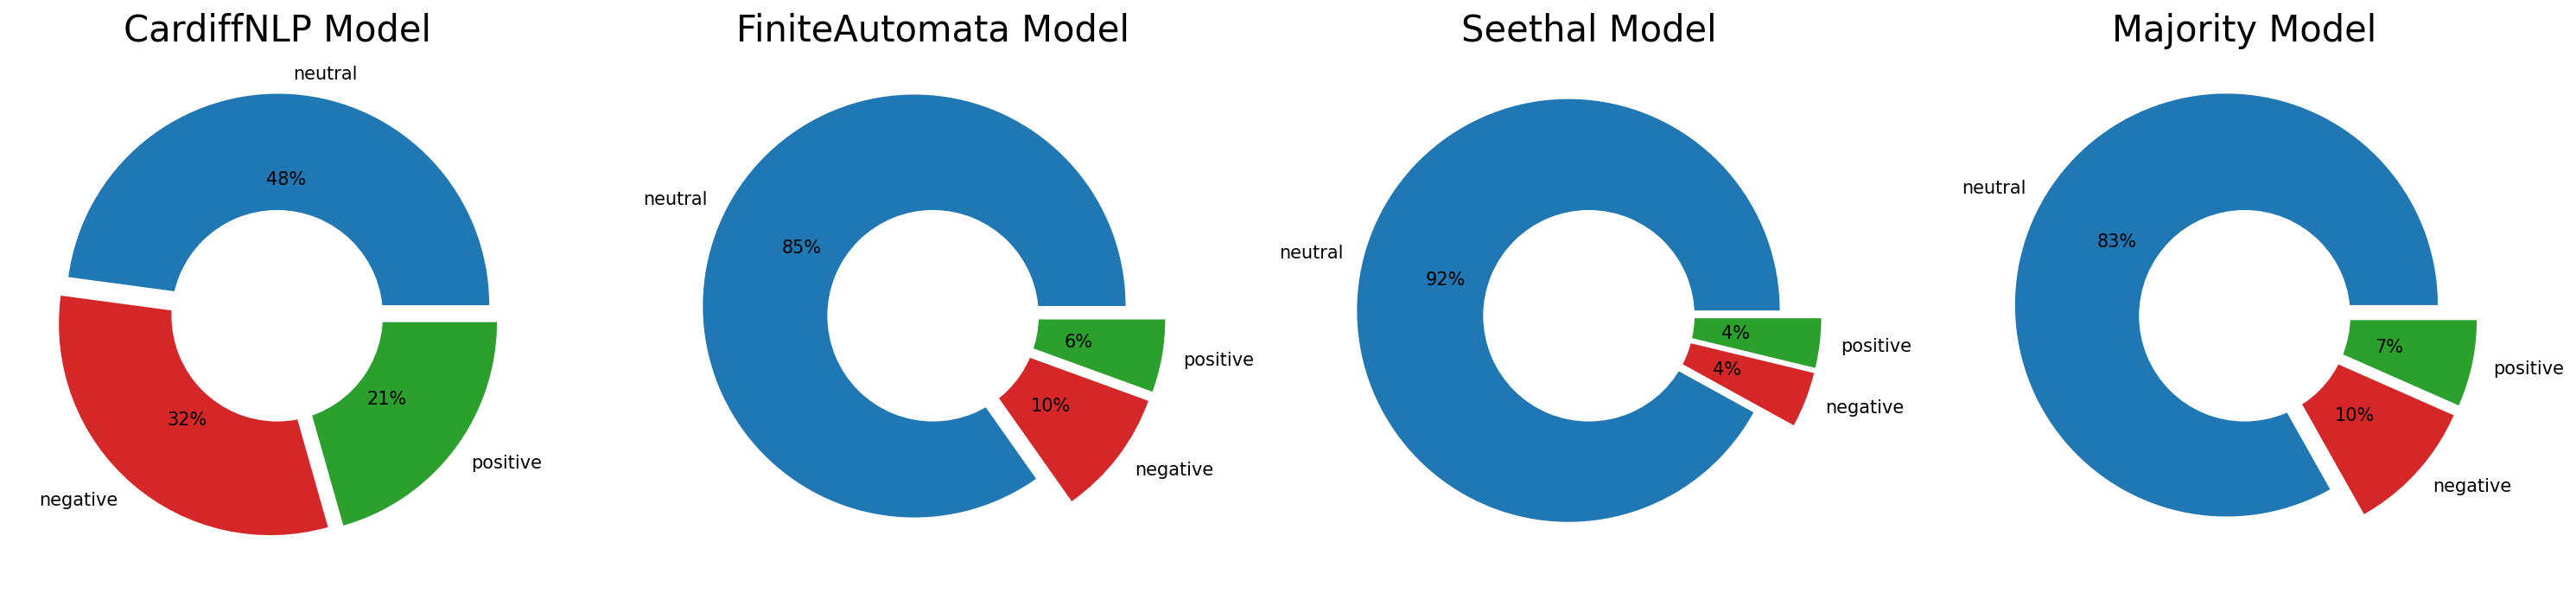

In [ ]:
plt.figure(figsize=(20, 15),dpi=150,  tight_layout=True)

plt.subplot(1, 4, 1)
Data['MODEL_LABEL_CARDIFFNLP'].value_counts().plot(kind='pie',autopct='%1.0f%%', colors=['C0', 'C3', 'C2'],explode=(0.05,0.05,0.05))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('CardiffNLP Model', fontsize=20)

plt.subplot(1, 4, 2)
Data['MODEL_LABEL_FINITEAUTOMATA'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['C0', 'C3', 'C2'],explode=(0.1,0.1,0.1))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('FiniteAutomata Model', fontsize=20)

plt.subplot(1, 4, 3)
Data['MODEL_LABEL_SEETHAL'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['C0', 'C3', 'C2'],explode=(0.1,0.1,0.1))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('Seethal Model', fontsize=20)

plt.subplot(1, 4, 4)
Data['MODEL_MAJORITY'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['C0', 'C3', 'C2'],explode=(0.1,0.1,0.1))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('Majority Model', fontsize=20)

plt.show()


This analysis underscores the prevalence of neutral sentiments within the Reddit comments from r/srilanka, as predicted by the three sentiment analysis models. The relatively lower percentages of positive and negative sentiments could be indicative of the nature of discussions and interactions within the subreddit.

---

## **Distribution of Deleted Comments and Removed Accounts**

The distribution of deleted comments and removed accounts can provide valuable insights into the activity, moderation, and user behavior within the r/srilanka subreddit.

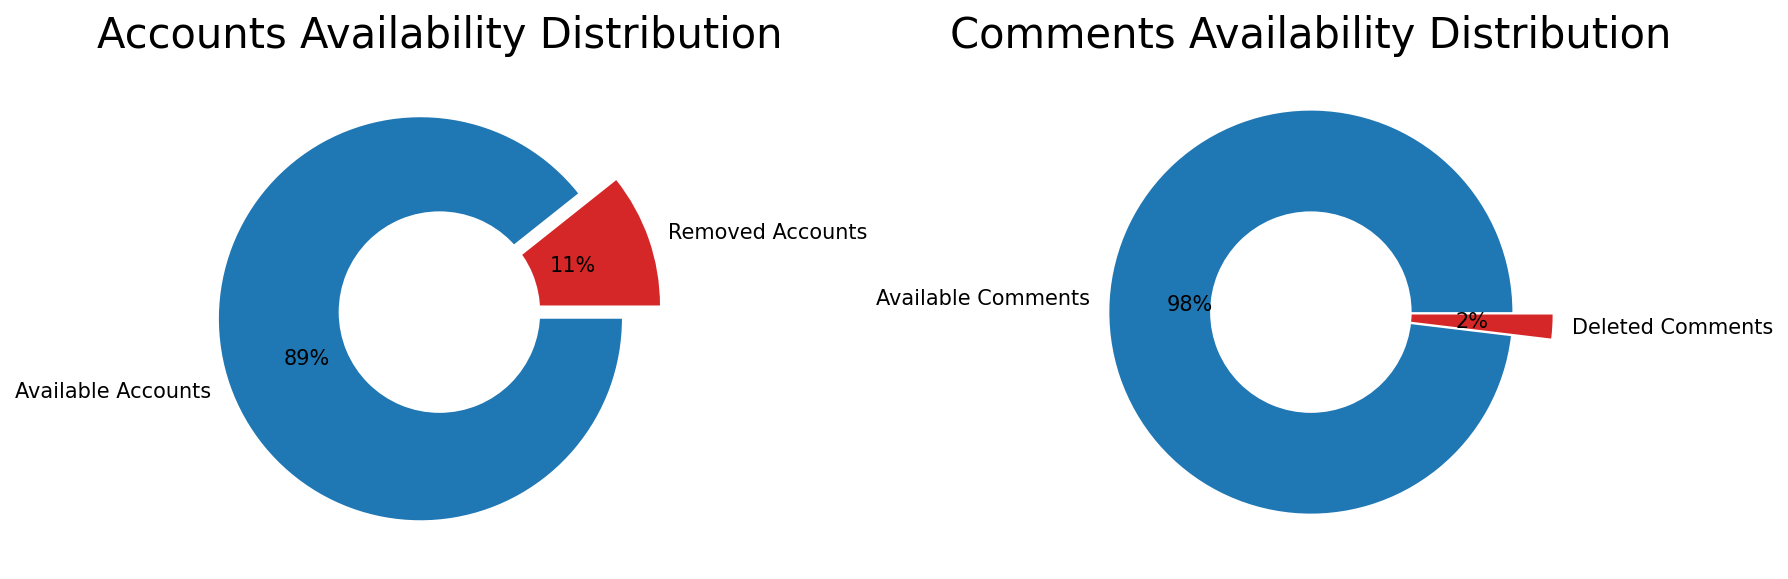

In [ ]:
plt.figure(figsize=(12,10), tight_layout=True, dpi=150)

plt.subplot(1, 2, 1)
plt.pie([Data['AUTHOR_USERNAME'].isna().sum(),Data['AUTHOR_USERNAME'].notna().sum()],autopct='%1.0f%%', colors=['C3', 'C0'],labels=['Removed Accounts','Available Accounts'],explode=(0.1,0.1))
plt.pie([1], radius=0.5, colors='w')
plt.title('Accounts Availability Distribution', fontsize=20)

plt.subplot(1, 2, 2)
plt.pie([Data[Data['COMMENT_TEXT_CONTENT']!='deleted'].shape[0],Data[Data['COMMENT_TEXT_CONTENT']=='deleted'].shape[0]],autopct='%1.0f%%', colors=['C0', 'C3'],labels=['Available Comments','Deleted Comments'],explode=(0,0.2))
plt.pie([1], radius=0.5, colors='w')
plt.title('Comments Availability Distribution', fontsize=20)
plt.show()


As Observed from the above Pie Plot, 11% of accounts were removed and 2% of comments were deleted. This can offer insights into the moderation and engagement dynamics of the r/srilanka subreddit.

Here's what this distribution might indicate:

### **Accounts Removed:**

- **Moderation Focus:** 11% percent of removed accounts suggests that there's a significant emphasis on maintaining a healthy and genuine user base within the subreddit.

- **Community Integrity:** The removal of accounts helps to ensure the authenticity and quality of discussions within the subreddit. By removing problematic or fake accounts, the community aims to foster more meaningful interactions.

- **Preventing Manipulation:** A notable number of removed accounts indicates vigilance against potential manipulation of discussions, voting patterns, or content. This helps maintain the subreddit's integrity and trustworthiness.

### **Comments Deleted:**

- **Moderation Consistency:** 2 percent of deleted comments suggests that the moderation focus is more on user accounts than on individual comments. This could imply that comments are generally aligned with the subreddit's guidelines.

- **User Awareness:** The fact that a smaller portion of comments are deleted indicates that users are likely aware of the subreddit's rules and are adhering to them, resulting in fewer comments that require removal.

- **Positive Engagement:** A lower deletion percentage could also indicate a more positive and respectful tone within discussions, with fewer comments falling into the category of spam, hate speech, or rule violations.

Overall, these percentages reflect a subreddit that places importance on maintaining a genuine and respectful user community while keeping a watchful eye on potential misuse and disruptive behavior. It's a positive sign that a larger proportion of comments adhere to the guidelines, resulting in a lower need for comment deletion.

----

## **Top Commenters in r/srilanka subreddit**

The information about the top commenters in the r/srilanka subreddit can help you understand who contributes the most to discussions and potentially who holds influential positions within the subreddit.

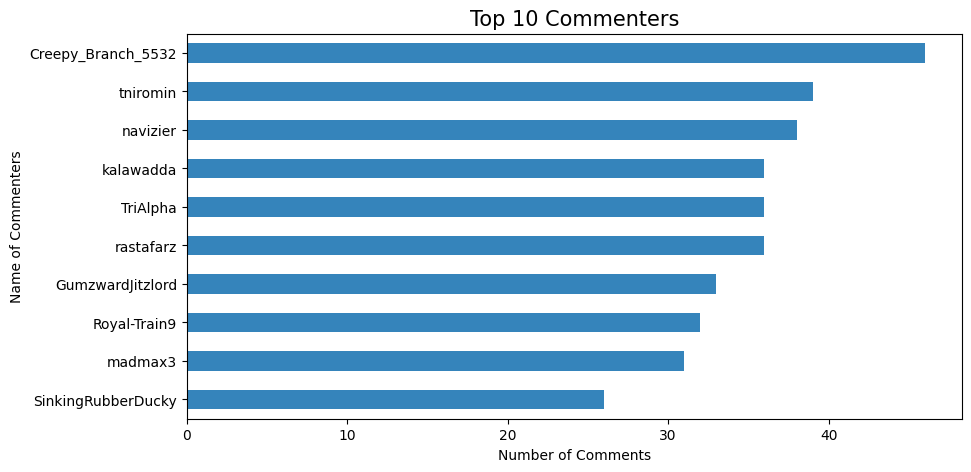

In [ ]:
plt.figure( figsize=(10, 5),dpi=100)
Data['AUTHOR_USERNAME'].value_counts(ascending=True).tail(10).plot(kind='barh',color='C0',alpha=0.9)
plt.xlabel('Number of Comments')
plt.ylabel('Name of Commenters')

plt.title('Top 10 Commenters', fontsize=15)
plt.show()

## **Top Emojies Used in the comments**

In [ ]:
def get_emojis(raw_markdown_text):
    regex = "!\[gif\]\(emote\|\w+\|(\w+)\)"
    return re.findall(regex, raw_markdown_text)

emojies = Data['RAW_TXT'].apply(get_emojis)

In [ ]:
emojies.value_counts(ascending=True).tail(10)

[table_flip]       1
[scream]           1
[dizzy_face]       1
[facepalm]         1
[heart_eyes]       1
[surprise]         1
[joy]              1
[downvote]         1
[grin]             2
[]              5661
Name: RAW_TXT, dtype: int64

Suprisingly there is not enough emojies in the comments.

---

## **Analysing the number of characters in each comment.**

Analyzing the number of characters in each comment can provide us valuable insights into the nature of the content, engagement levels, and communication style within the r/srilanka subreddit.

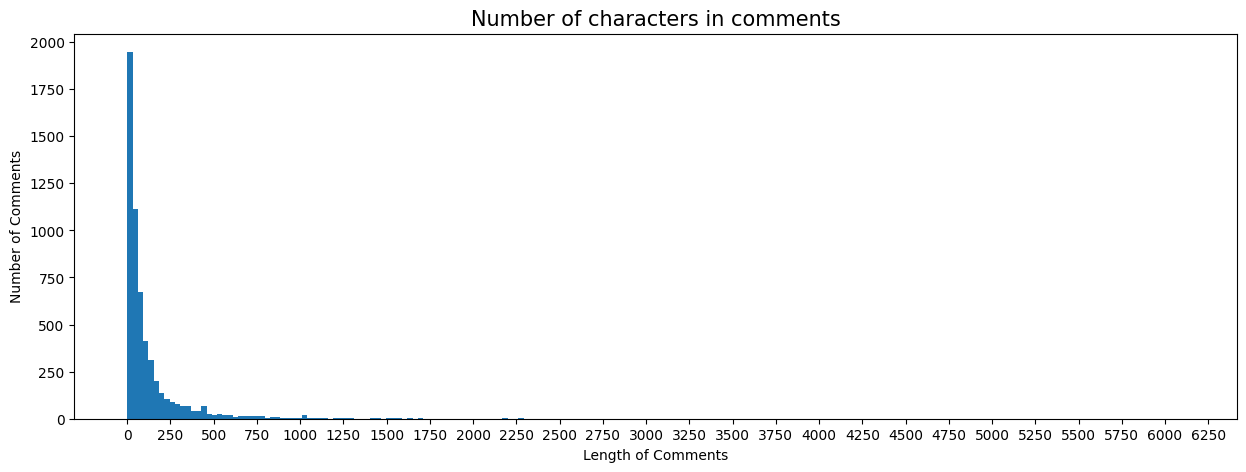

In [ ]:
plt.figure( figsize=(15, 5))
Data['COMMENT_TEXT_CONTENT'].str.len().plot(kind='hist',bins=200)
plt.xlabel('Length of Comments')
plt.xticks(np.arange(0, 6500, 250))
plt.ylabel('Number of Comments')
plt.title('Number of characters in comments', fontsize=15)
plt.show()

Some big numbers are present in the data. Let's see what they are.

In [ ]:
Data['COMMENT_TEXT_CONTENT'].str.len().sort_values(ascending=False).head(10)

5127    6110
3099    4212
5337    3424
111     3242
4819    2891
5314    2810
5209    2325
228     2289
5194    2265
927     2188
Name: COMMENT_TEXT_CONTENT, dtype: int64

In [ ]:
Data.iloc[5127].COMMENT_TEXT_CONTENT

'lanka wa far from being stone age lanka wa advanced in rome time and remained so up until the portuguese invasion in ad when it wa rediscovered by a roman tax ship sailed astray emperor claudius wa shocked to learn that lanka during the anuradhapura kingdom wa not only better urbanized than rome but also a advanced in it hydraulics infrastructure a rome egypt and babylonnia the sinhalese of that time whom the roman began trading with were detailed a being a noble people of buddhist dharma who enjoyed immense wealth and plentiful food where the average person enjoyed the delicacy s of a king and the king lived a an average person the imperial court did not like the roman people learning about anuradhapura state craft a it came on the heel of nero suicide lanka during this period wa ruled by an elected monarchy which the people themselves were allowed to reject in the event the king fails to uphold the dasaviddha rajadhama the precept of kingship set forth by buddha furthermore sri lank

In [ ]:
Data.iloc[5337].COMMENT_TEXT_CONTENT

'that s fine we are no longer talking about sri lanka now but anyway not sure if you realise that all those problem you mentioned pre dated the british period they may have worsened under british influence but they were all ready violent and there wa a history of bloodshed before and long after the british were there european jew were coming in large number by during the ottoman period more than year prior to the british rule of palestine they were not well received at all by the local at any time ethnic divide between jew and arab created to parralel society in fact there were so many riot massacre and attack on jewish settlement by palestinian arab in the s the jew formed a paramilitary defence force called the harshomer for the sole purpose of stopping arab insurgent from killing them thing got worse in the s and s in the holocaust because million of jew left europe for palestine leading to a full scale war once the british army left in the india and pakistan conflict predates anyth

---

## **Number of words appearing in comments**

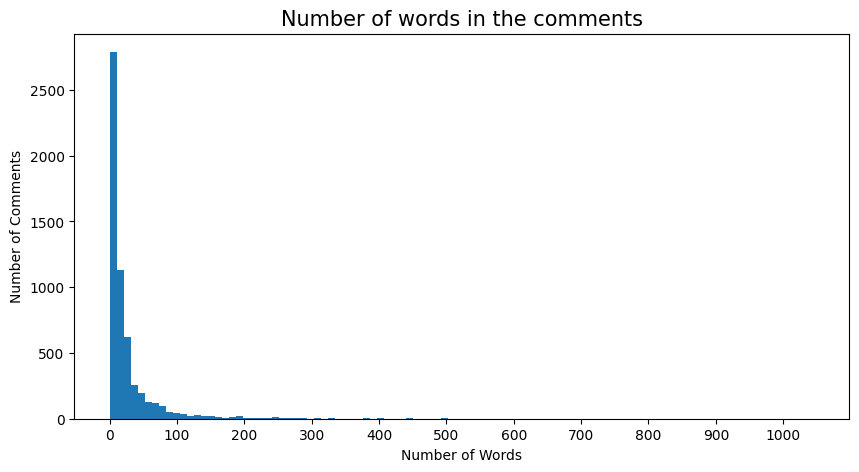

In [ ]:
plt.figure( figsize=(10, 5),dpi=100)
Data['COMMENT_TEXT_CONTENT'].str.split().apply(lambda x: len(x)).plot(kind='hist',bins=100,figsize=(10,5))
plt.xlabel('Number of Words')
plt.xticks(np.arange(0, 1100, 100))
plt.ylabel('Number of Comments')
plt.title('Number of words in the comments', fontsize=15)
plt.show()

Lets check the big numbers in the data.

In [ ]:
Data['COMMENT_TEXT_CONTENT'].str.split().apply(lambda x: len(x)).sort_values(ascending=False).head(10)

5127    1046
3099     798
5337     610
111      597
5314     502
4819     495
5209     466
228      443
5194     440
5147     406
Name: COMMENT_TEXT_CONTENT, dtype: int64

In [ ]:
Data.iloc[5127].COMMENT_TEXT_CONTENT

'lanka wa far from being stone age lanka wa advanced in rome time and remained so up until the portuguese invasion in ad when it wa rediscovered by a roman tax ship sailed astray emperor claudius wa shocked to learn that lanka during the anuradhapura kingdom wa not only better urbanized than rome but also a advanced in it hydraulics infrastructure a rome egypt and babylonnia the sinhalese of that time whom the roman began trading with were detailed a being a noble people of buddhist dharma who enjoyed immense wealth and plentiful food where the average person enjoyed the delicacy s of a king and the king lived a an average person the imperial court did not like the roman people learning about anuradhapura state craft a it came on the heel of nero suicide lanka during this period wa ruled by an elected monarchy which the people themselves were allowed to reject in the event the king fails to uphold the dasaviddha rajadhama the precept of kingship set forth by buddha furthermore sri lank

In [ ]:
Data.iloc[3099].COMMENT_TEXT_CONTENT

'saw your post asking about him cause you are an immigrant child of sri lankan parent i m running a bit late today so i ll explain in brief and some others might add the thing i might forget dirty politics here he appoints the people he want to the position which play a critical role in law enforcement he made the court supreme maybe don t wan na get arrested like ranjan release many people after making them relieved of all the accusation including criminal and the people responsible for the easter sunday attack shitty ruling x b excessive expense for medium attention he go from village to village to know about the problem faced by rural people it wa something he planned to do for a while but i can t remember it very much he go there and speaks with people about their problem just because he come stage and other facility are arranged for him which can be used for the betterment of the village autocratic behaviour once he wa out in an above kind of a programme where he wa told about an 

In [ ]:
Data.iloc[5337].COMMENT_TEXT_CONTENT

'that s fine we are no longer talking about sri lanka now but anyway not sure if you realise that all those problem you mentioned pre dated the british period they may have worsened under british influence but they were all ready violent and there wa a history of bloodshed before and long after the british were there european jew were coming in large number by during the ottoman period more than year prior to the british rule of palestine they were not well received at all by the local at any time ethnic divide between jew and arab created to parralel society in fact there were so many riot massacre and attack on jewish settlement by palestinian arab in the s the jew formed a paramilitary defence force called the harshomer for the sole purpose of stopping arab insurgent from killing them thing got worse in the s and s in the holocaust because million of jew left europe for palestine leading to a full scale war once the british army left in the india and pakistan conflict predates anyth

##### **Why the big numbers?**

So...Looking at the graph and the examples, We can conclude that there are some comments that could be classified as essays too.The presence of both short comments and extremely long comments suggests a wide range of content types and engagement levels. Short comments might include quick reactions, agreement, or simple interactions, while longer comments could involve in-depth discussions, detailed explanations, or the sharing of comprehensive information.

---

##  **Word length in each comment.**

The average word length might provide insights into the vocabulary level used by commenters. Shorter words might indicate concise and straightforward communication, while longer words could suggest a more formal or technical style.

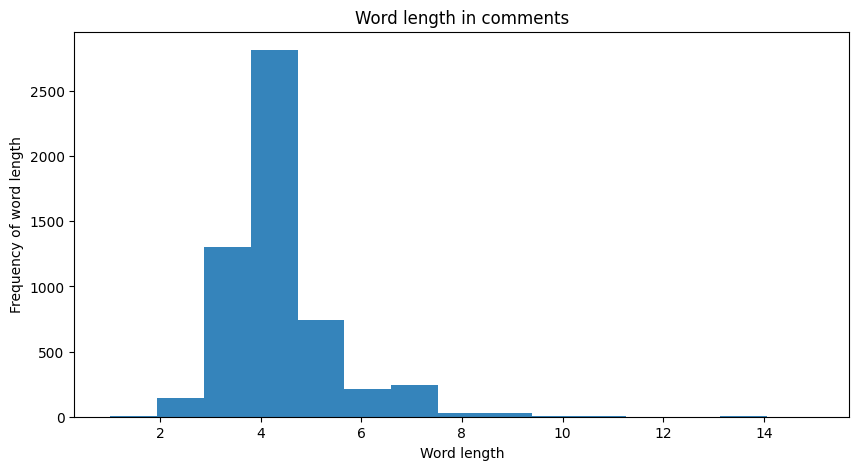

In [ ]:
plt.figure( figsize=(10, 5),dpi=100)
Data['COMMENT_TEXT_CONTENT'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).plot(kind='hist',bins=15,figsize=(10,5),alpha=0.9)
plt.title("Word length in comments")
plt.ylabel("Frequency of word length")
plt.xlabel("Word length")
plt.show()

Lets check out the Big numbers.

In [ ]:
Data['COMMENT_TEXT_CONTENT'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).sort_values(ascending=False).head(10)

5569    15.0
5407    14.0
2198    14.0
2199    14.0
5390    14.0
4967    14.0
5395    14.0
2385    13.0
1041    11.0
774     11.0
Name: COMMENT_TEXT_CONTENT, dtype: float64

In [ ]:
Data.iloc[5569].COMMENT_TEXT_CONTENT

'lmaoooooooooooo'

In [ ]:
Data.iloc[5407].COMMENT_TEXT_CONTENT

'congratulation'

In [ ]:
Data.iloc[2198].COMMENT_TEXT_CONTENT

'congratulation'

Now as we can observe most of these comments are exclamatory sentences where users are expressing joy!. As most of the words used are of shorter length we can conclude that the communication pattern on the srilanka subreddit is mostly informal.

---

## **Analyzing the Amount of Stopwords in our comments.**

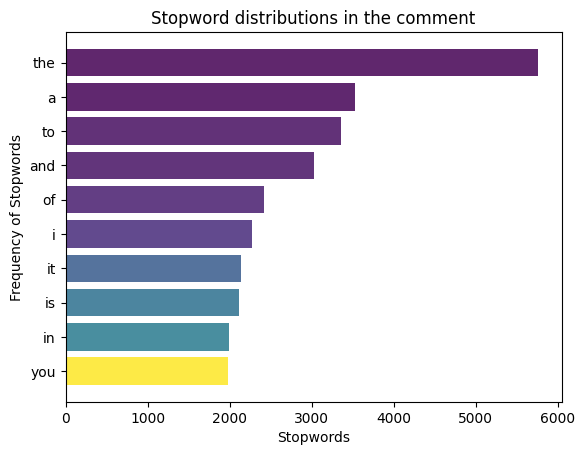

In [ ]:
stop=set(stopwords.words('english'))
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    norm = plt.Normalize(min(y), max(y))
    cmap = colormaps['viridis']
    bar_colors = cmap(norm(y))
    plt.barh(x[::-1],y[::-1],alpha=0.85,color=bar_colors)
    # plt.plot(x,y,marker='o')
    plt.title("Stopword distributions in the comment")
    plt.xlabel("Stopwords")
    plt.ylabel("Frequency of Stopwords")
    plt.show()

plot_top_stopwords_barchart(Data['COMMENT_TEXT_CONTENT'])


## **Analyzing Words other than Stopwords**

Analyzing non-stopword words can give us a sense of the language richness and vocabulary level used by commenters.Detecting the frequency of certain non-stopword words can help you identify trends, events, or popular topics.

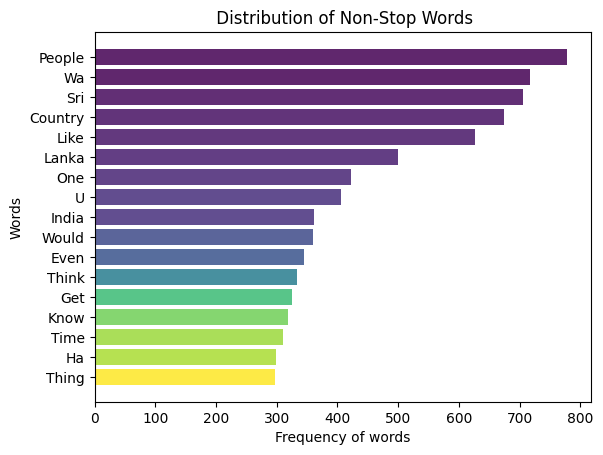

In [ ]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    lowercased_tokens = [token.lower() for token in corpus]
    cleaned_tokens = [token for token in lowercased_tokens if token.isalpha()]

    counter=Counter(cleaned_tokens)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:75]:
        if (word not in stop):
            x.append(word.capitalize())
            y.append(count)
    plt.figure()
    norm = plt.Normalize(min(y), max(y))
    cmap =  colormaps['viridis']
    bar_colors = cmap(norm(y))
    plt.barh(x[::-1],y[::-1],color=bar_colors,alpha=0.85)
    plt.title(" Distribution of Non-Stop Words")
    plt.ylabel("Words")
    plt.xlabel("Frequency of words")
    plt.show()

plot_top_non_stopwords_barchart(Data['COMMENT_TEXT_CONTENT'])


The mention of 'India' could indicate that discussions within the subreddit extend beyond local matters and include international topics, such as relationships with neighboring countries. Users might discuss India in relation to trade, tourism, cultural exchanges, or economic ties between the two countries. The presence of 'India' could also indicate that there are potentially controversial or debated issues related to India that are being discussed within the subreddit.

---

## **Ngram Exploration**

N-grams reveal common language patterns and structures used by authors in the text corpus. For example, 2-grams (bigrams) can show frequently occurring pairs of words, while 3-grams (trigrams) reveal triplets of words that often appear together.

In [ ]:
def plot_top_ngrams_barchart(text, n=2):
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                        for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:15]
    x,y=map(list,zip(*top_n_bigrams))
    norm = plt.Normalize(min(y), max(y))
    cmap =  colormaps['Spectral_r']
    bar_colors = cmap(norm(y))
    plt.barh(x[::-1],y[::-1],color=bar_colors,alpha=0.85)
    plt.ylabel(" Words ")
    plt.xlabel(" Frequency of words ")
    plt.show()

### Bigram Analysis


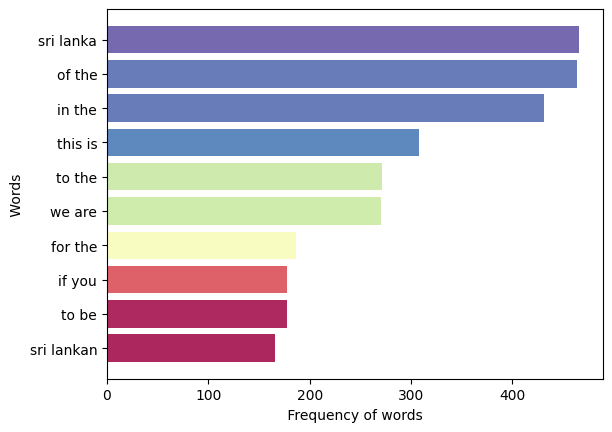

In [ ]:
plot_top_ngrams_barchart(Data['COMMENT_TEXT_CONTENT'], n=2)

### Trigram Analysis

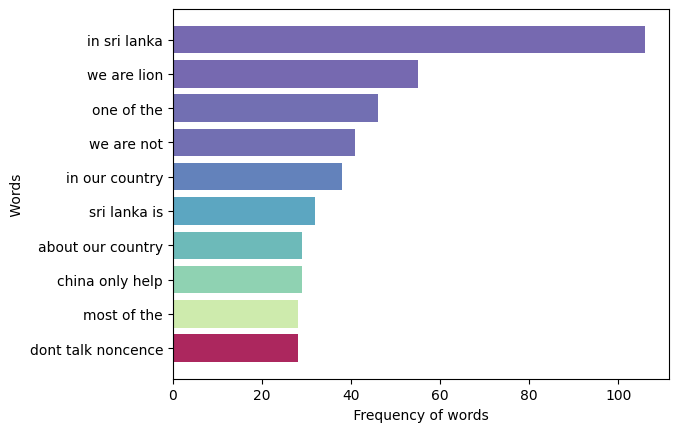

In [ ]:
plot_top_ngrams_barchart(Data['COMMENT_TEXT_CONTENT'], n=3)

### Tetragram Analysis

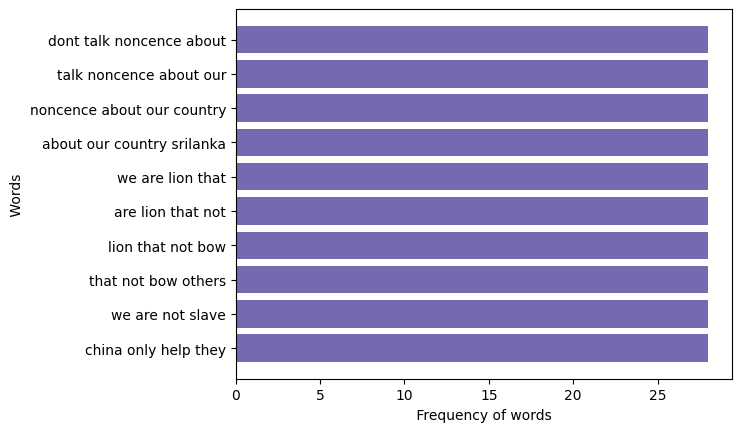

In [ ]:
plot_top_ngrams_barchart(Data['COMMENT_TEXT_CONTENT'], n=4)

# **Word Cloud**

In [ ]:
def plot_wordcloud(text):

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(text)

    wordcloud = WordCloud(
        background_color='black',
        stopwords=set(STOPWORDS),
        max_words=50,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

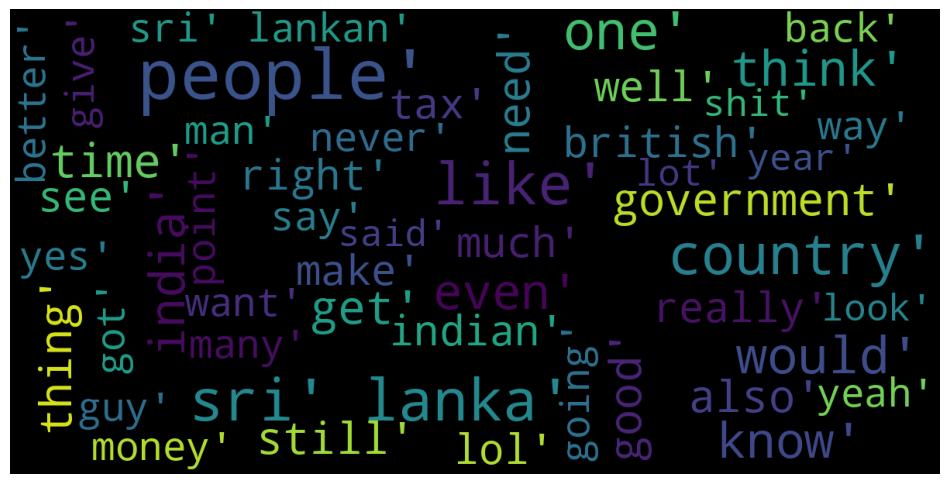

In [ ]:
plot_wordcloud(Data['COMMENT_TEXT_CONTENT'])